In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [23]:
n = 500
sm = 500

In [24]:
# smooth = [df['value'][i:i+sm].mean() for i in range(0, len(df)-sm)]
# plt.plot(smooth)

In [25]:
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n)])
y = np.array([df['value'].values[i+n] for i in range(len(df)-n)])

In [6]:
# X = np.array([np.array(smooth[i:i+n]) for i in range(len(smooth)-n)])
# y = np.array([np.array(smooth[i+n]) for i in range(len(smooth)-n)])

In [29]:
len(X), len(y)

(24989, 24989)

In [30]:
X.shape, y.shape

((24989, 1000), (24989,))

In [31]:
X = X.reshape((X.shape[0], X.shape[1], 1))

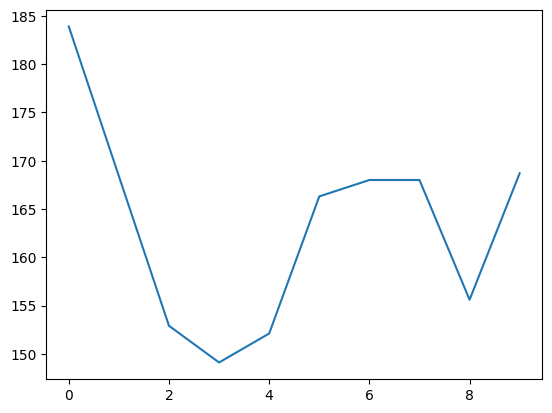

In [38]:
plt.plot(X[0][-10:])

In [33]:
X_test, y_test = X[-n:], y[-n:]

In [34]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

In [35]:
X_train, X_val, y_train, y_val = train_test_split(np.array(X[:-n]), np.array(y[:-n]), test_size=0.2, random_state=42)

In [36]:
X_train[0], y_train[0]

(array([[ 88.9],
        [ 91.8],
        [ 93.1],
        [ 91.8],
        [ 87.2],
        [ 85.5],
        [ 84.7],
        [ 84.8],
        [ 83.1],
        [ 81.8],
        [ 82. ],
        [ 81.7],
        [ 81.9],
        [ 82.4],
        [ 80.9],
        [ 81.1],
        [ 78.9],
        [ 77.1],
        [ 76.6],
        [ 76.5],
        [ 78. ],
        [ 79. ],
        [ 80. ],
        [ 78.2],
        [ 77.1],
        [ 75.4],
        [ 75.1],
        [ 76.8],
        [ 79.3],
        [ 83.1],
        [ 88.5],
        [ 90.7],
        [ 88.3],
        [ 85.5],
        [ 84.3],
        [ 85.9],
        [ 85. ],
        [ 83.7],
        [ 82.8],
        [ 84.1],
        [ 81.9],
        [ 83.3],
        [ 83.9],
        [ 87.1],
        [ 85.5],
        [ 87.8],
        [ 85.7],
        [ 82.9],
        [ 82.6],
        [ 80.9],
        [ 79.1],
        [ 76.1],
        [ 77.4],
        [ 78.7],
        [ 79.3],
        [ 77.7],
        [ 76.5],
        [ 75.9],
        [ 76.3

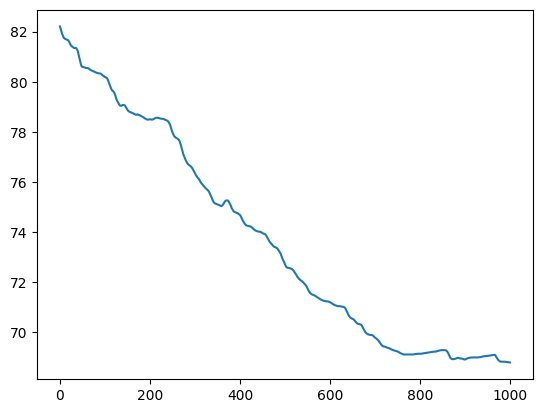

In [21]:
plt.plot(X_train[0])
plt.plot(1001, y_train[0], color='yellow')

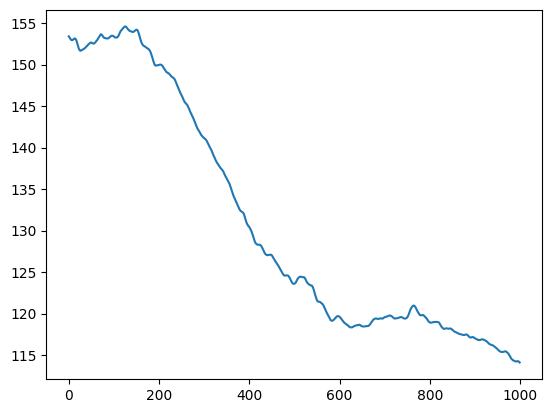

In [16]:
plt.plot(X_train[1])

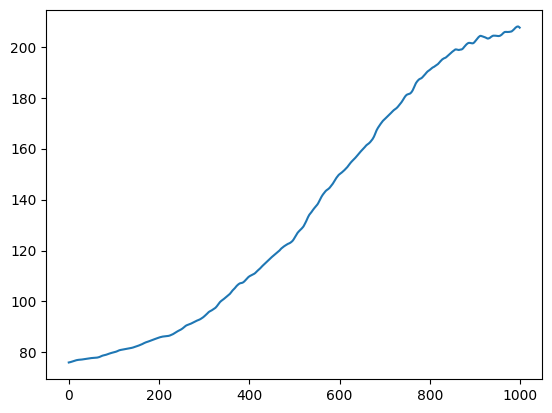

In [18]:
plt.plot(X_train[2])

In [13]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((18791, 1000, 1), (4698, 1000, 1), (18791,), (4698,))

In [14]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

In [15]:
def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

In [29]:
model1 = Sequential()
# model1.add(SimpleRNN(200, dropout=0.2, recurrent_dropout=0.2))
model1.add(LSTM(100, return_sequences=True, input_shape=[None, 1]))
# model1.add(GRU(20, input_shape=[None, 1]))
# model1.add(GRU(100, return_sequences=True))
model1.add(LSTM(50))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 100)         40800     
                                                                 
 dense_4 (Dense)             (None, None, 1)           101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history1 = model1.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
588/588 [==============================] - 26s 41ms/step - loss: 10006.8838 - mae: 86.7659 - val_loss: 5809.4038 - val_mae: 60.4124
Epoch 2/10
588/588 [==============================] - 22s 38ms/step - loss: 3909.0925 - mae: 46.2399 - val_loss: 2821.8872 - val_mae: 40.5701
Epoch 3/10
588/588 [==============================] - 24s 40ms/step - loss: 2391.3079 - mae: 38.8959 - val_loss: 2227.1570 - val_mae: 38.6887
Epoch 4/10
588/588 [==============================] - 23s 39ms/step - loss: 2166.6453 - mae: 38.7737 - val_loss: 2166.0488 - val_mae: 39.0771
Epoch 5/10
588/588 [==============================] - 24s 41ms/step - loss: 2150.6938 - mae: 39.1189 - val_loss: 2161.1279 - val_mae: 39.2721
Epoch 6/10
588/588 [==============================] - 23s 40ms/step - loss: 2150.2510 - mae: 39.2363 - val_loss: 2161.1487 - val_mae: 39.2673
Epoch 7/10
588/588 [==============================] - 22s 38ms/step - loss: 2150.2334 - mae: 39.2147 - val_loss: 2161.6899 - val_mae: 39.2315
Epoch

In [31]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-n])
    for i in range(num):
        temp = data_pred[-n:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]



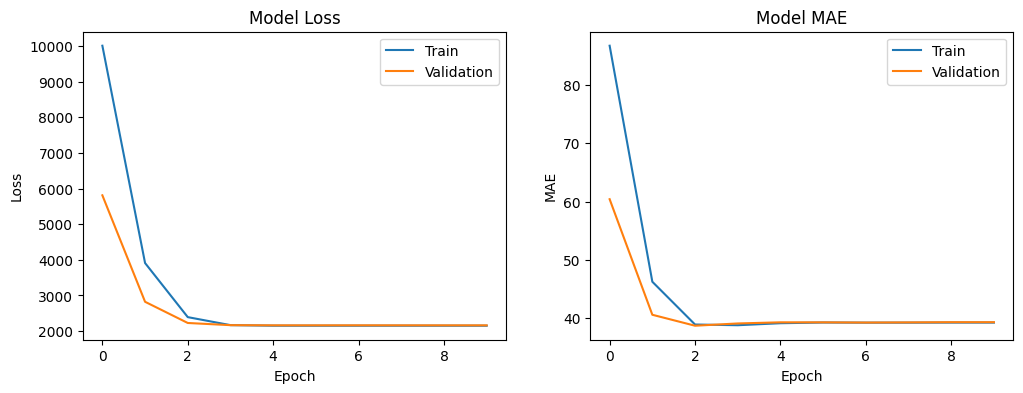

In [32]:
plot_result(history1)

In [33]:
pred1 = make_pred(300, model1)

1/1 [==============================] - 0s 34ms/step


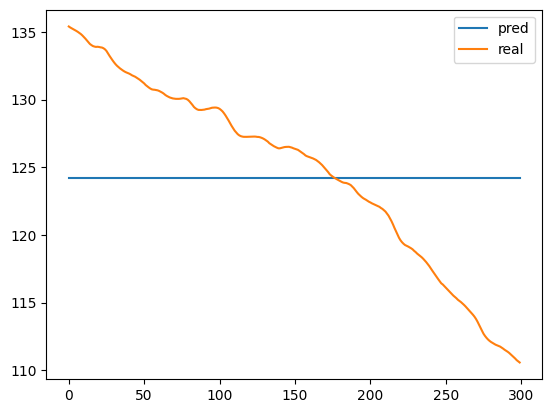

In [35]:
plt.plot(pred1, label='pred')
plt.plot(y_test[:300], label='real')
plt.legend()

In [26]:
df.head()

,Date,value
44,19470305,306.10
45,19470306,306.00
46,19470307,321.40
47,19470308,345.60
48,19470309,335.75


In [ ]:
len(df)

In [ ]:
df['value'][3000:4000].plot()

In [ ]:
n = 300
plt.plot(recent['value'].values[-n-100:-100], label='before', color='blue')
plt.plot(range(n, n+100), pred1, label='pred', color='orange')
plt.plot(range(n, n+100), y_test, label='real', color='green')
plt.legend()